In [31]:
import numpy as np
import pandas as pd
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
tweetsCSV = pd.read_csv("Tweets.csv")

In [4]:
tweetsCSV.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
del tweetsCSV['airline_sentiment_gold']
del tweetsCSV['negativereason_gold']
del tweetsCSV['tweet_coord']

tweetsCSV.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [6]:
tweetsCSV.count()

tweet_id                        14640
airline_sentiment               14640
airline_sentiment_confidence    14640
negativereason                   9178
negativereason_confidence       10522
airline                         14640
name                            14640
retweet_count                   14640
text                            14640
tweet_created                   14640
tweet_location                   9907
user_timezone                    9820
dtype: int64

In [7]:
tweetsCSV.isnull().sum()

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
dtype: int64

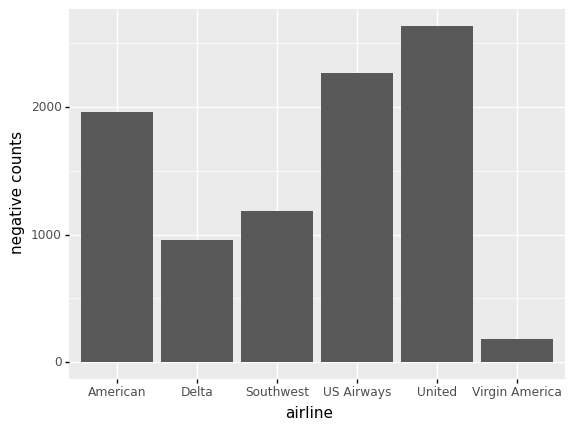

<ggplot: (8777882546679)>

In [8]:
negTweets = tweetsCSV[tweetsCSV["airline_sentiment"] == "negative"]

(ggplot(negTweets, aes("airline")) + geom_bar() + ylab("negative counts"))

In [9]:
tweetsCSV.groupby(["airline"])["airline"].count()

airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline, dtype: int64

In [10]:
neg = negTweets.groupby(["airline"])["airline"].count()
#print(neg)

In [11]:
totalRow = tweetsCSV.groupby(["airline"])["airline"].count()
#print(totalRow)

In [12]:
negRelFreq = pd.DataFrame([neg / totalRow] * 100)
negRelFreq = negRelFreq.melt().rename(columns = {"value": "negative rel. freq. (%)"}, inplace = False)
#print(negRelFreq.columns)

#negRelFreq.head()

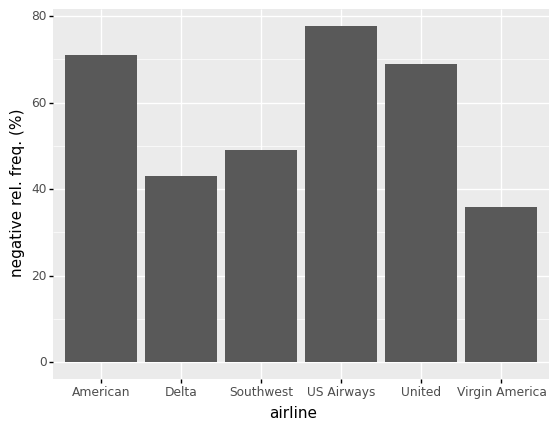

<ggplot: (8777883099079)>

In [13]:
(ggplot(negRelFreq, aes(x = "airline", y = "negative rel. freq. (%)")) + geom_col())

In [14]:
negReasonWithAirline = tweetsCSV[tweetsCSV["airline_sentiment"] == "negative"]
negReasonWithAirline = negReasonWithAirline[negReasonWithAirline["negativereason"] != "Can't Tell"]


negReasonWithAirline[["airline","negativereason"]]

,airline,negativereason
3,Virgin America,Bad Flight
15,Virgin America,Late Flight
17,Virgin America,Bad Flight
24,Virgin America,Customer Service Issue
25,Virgin America,Customer Service Issue
...,...,...
14631,American,Bad Flight
14633,American,Cancelled Flight
14634,American,Late Flight
14636,American,Customer Service Issue


In [15]:
negReasonCount = pd.DataFrame(negReasonWithAirline.groupby("airline")["negativereason"].value_counts().groupby("airline").nlargest(5))

negReasonCount

negativereason
airline        airline        negativereason                             
American       American       Customer Service Issue                  768
                              Late Flight                             249
                              Cancelled Flight                        246
                              Lost Luggage                            149
                              Flight Booking Problems                 130
Delta          Delta          Late Flight                             269
                              Customer Service Issue                  199
                              Bad Flight                               64
                              Flight Attendant Complaints              60
                              Lost Luggage                             57
Southwest      Southwest      Customer Service Issue                  391
                              Cancelled Flight                        162
                              Late Flight                             152
                              Bad Flight                               90
                              Lost Luggage                             90
US Airways     US Airways     Customer Service Issue                  811
                              Late Flight                             453
                              Cancelled Flight                        189
                              Lost Luggage                            154
                              Flight Attendant Complaints             123
United         United         Customer Service Issue                  681
                              Late Flight                             525
                              Lost Luggage                            269
                              Bad Flight                              216
                              Cancelled Flight                        181
Virgin America Virgin America Customer Service Issue                   60
                              Flight Booking Problems                  28
                              Bad Flight                               19
                              Cancelled Flight                         18
                              Late Flight                              17

,tweet_id,airline_sentiment,airline,retweet_count,tweet_created
1,570301130888122368,positive,Virgin America,0,2015-02-24 11:15:59 -0800
3,570301031407624196,negative,Virgin America,0,2015-02-24 11:15:36 -0800
4,570300817074462722,negative,Virgin America,0,2015-02-24 11:14:45 -0800
5,570300767074181121,negative,Virgin America,0,2015-02-24 11:14:33 -0800
6,570300616901320704,positive,Virgin America,0,2015-02-24 11:13:57 -0800
...,...,...,...,...,...
14633,569587705937600512,negative,American,0,2015-02-22 12:01:06 -0800
14634,569587691626622976,negative,American,0,2015-02-22 12:01:02 -0800
14635,569587686496825344,positive,American,0,2015-02-22 12:01:01 -0800
14636,569587371693355008,negative,American,0,2015-02-22 11:59:46 -0800


ValueError: could not convert string to float: 'American'